In [1]:
import uproot
import h5py
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
def printattr(name, object):
    print(name)
h5py_file = h5py.File('ttbar_testing_mass_variation/ttbar_testing_170_gev.h5', "r")
h5py_file.visititems(printattr)

event_features
event_features/mt
event_features/mx
jet_features
jet_features/barcode
jet_features/btag
jet_features/charge
jet_features/eta
jet_features/event
jet_features/mass
jet_features/num_of_jets
jet_features/phi
jet_features/pt
lepton_features
lepton_features/charge
lepton_features/eta
lepton_features/mass
lepton_features/phi
lepton_features/pid
lepton_features/pt
met_features
met_features/MET
met_features/eta
met_features/phi
met_features/sumet
neutrino_eta
neutrino_eta/spanet
neutrino_eta/target
parton_features
parton_features/eta
parton_features/masks
parton_features/mass
parton_features/parton_barcode
parton_features/pdgid
parton_features/phi
parton_features/pt
spanet
spanet/left_target
spanet/left_target/b
spanet/left_target/detection
spanet/left_target/mask
spanet/reconstructed_top_mass
spanet/right_target
spanet/right_target/b
spanet/right_target/detection
spanet/right_target/mask
spanet/right_target/q1
spanet/right_target/q2
target
target/left_target
target/left_target/b

In [32]:
def get_reco_top_mass(h5py_file):
    dic = {}

    #Load pt, eta, phi, and mass from file.
    q1 = np.array([[i] for i in h5py_file['spanet/right_target/q1'][:]])
    dic['q1_pt'] = np.take_along_axis(h5py_file['jet_features/pt'][:], q1, axis=1).flatten()
    dic['q1_eta'] = np.take_along_axis(h5py_file['jet_features/eta'][:], q1, axis=1).flatten()
    dic['q1_phi'] = np.take_along_axis(h5py_file['jet_features/phi'][:], q1, axis=1).flatten()
    dic['q1_mass'] = np.take_along_axis(h5py_file['jet_features/mass'][:], q1, axis=1).flatten()

    q2 = np.array([[i] for i in h5py_file['spanet/right_target/q2'][:]])
    dic['q2_pt'] = np.take_along_axis(h5py_file['jet_features/pt'][:], q2, axis=1).flatten()
    dic['q2_eta'] = np.take_along_axis(h5py_file['jet_features/eta'][:], q2, axis=1).flatten()
    dic['q2_phi'] = np.take_along_axis(h5py_file['jet_features/phi'][:], q2, axis=1).flatten()
    dic['q2_mass'] = np.take_along_axis(h5py_file['jet_features/mass'][:], q2, axis=1).flatten()

    b = np.array([[i] for i in h5py_file['spanet/right_target/b'][:]])
    dic['b_pt'] = np.take_along_axis(h5py_file['jet_features/pt'][:], b, axis=1).flatten()
    dic['b_eta'] = np.take_along_axis(h5py_file['jet_features/eta'][:], b, axis=1).flatten()
    dic['b_phi'] = np.take_along_axis(h5py_file['jet_features/phi'][:], b, axis=1).flatten()
    dic['b_mass'] = np.take_along_axis(h5py_file['jet_features/mass'][:], b, axis=1).flatten()
    
    # px = pt*cos(phi)
    # py = pt*sin(phi)
    # pz = pt*sinh(eta)
    dic['px1'] = dic['q1_pt']*np.cos(dic['q1_phi'])
    dic['py1'] = dic['q1_pt']*np.sin(dic['q1_phi'])
    dic['pz1'] = dic['q1_pt']*np.sinh(dic['q1_eta'])

    dic['px2'] = dic['q2_pt']*np.cos(dic['q2_phi'])
    dic['py2'] = dic['q2_pt']*np.sin(dic['q2_phi'])
    dic['pz2'] = dic['q2_pt']*np.sinh(dic['q2_eta'])

    dic['bx'] = dic['b_pt']*np.cos(dic['b_phi'])
    dic['by'] = dic['b_pt']*np.sin(dic['b_phi'])
    dic['bz'] = dic['b_pt']*np.sinh(dic['b_eta'])

    # M = sqrt((m1+m2)**2 + (px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2)
    dic['reconstructed_top_mass'] = np.sqrt((dic['q1_mass']+dic['q2_mass']+dic['b_mass'])**2
                    + (dic['px1']+dic['px2']+dic['bx'])**2
                    + (dic['py1']+dic['py2']+dic['by'])**2
                    + (dic['pz1']+dic['pz2']+dic['bz'])**2)
    
    """
    cuts
    130 < reco_m_top < 220
    55 < reco_m_W < 110
    0.3 < reco_R_bq < 3.0
    """

    cut1 = np.logical_and(dic['reconstructed_top_mass'] < 220, dic['reconstructed_top_mass'] > 130)
    # cut2 = np.logical_and(dic['reconstructed_W_mass'] < 110, dic['reconstructed_W_mass'] > 55)
    # cut3 = np.logical_and(dic['reconstructed_R_bq'] < 3.0, dic['reconstructed_R_bq'] > 0.3)
    cuts = cut1
    for key in dic: dic[key] = dic[key][cuts]
    return dic['reconstructed_top_mass']

In [33]:
# The reco_top_mss from ttbar_testing_mass_variation
mass = [170, 171, 172, 173, 174, 175, 176]
reco_dic = {}
for m in mass:
    h5py_file = h5py.File('ttbar_testing_mass_variation/ttbar_testing_{}_gev.h5'.format(m), "r")
    reco_dic[m] = get_reco_top_mass(h5py_file)

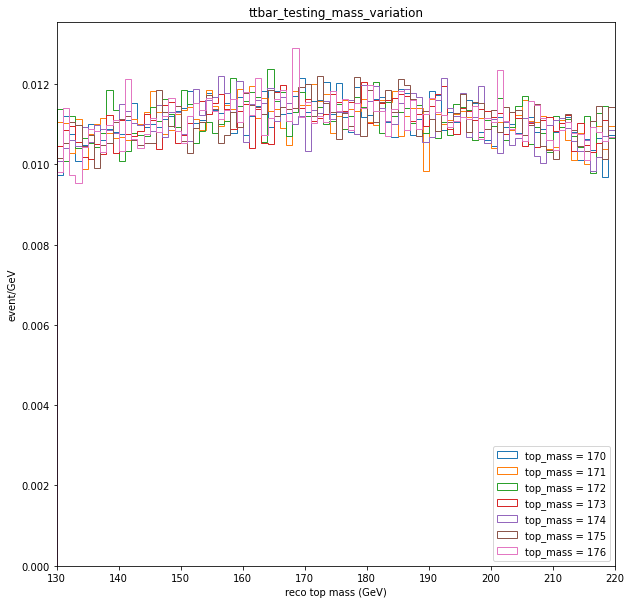

In [34]:
plt.figure(figsize=(10,10))
for m in mass:
    plt.hist(reco_dic[m], density=True,
            histtype='step', bins=90, label='top_mass = ' + str(m))
plt.title('ttbar_testing_mass_variation')
plt.xlim(130, 220)
plt.xlabel('reco top mass (GeV)')
plt.ylabel('event/GeV')
plt.legend(loc='lower right')
plt.show()

In [35]:
# The reco_top_mass from ttbar_sm_with_spanet_with_eta
h5py_file = h5py.File('./ttbar_sm_with_spanet_with_eta/ttbar_sm_with_spanet_with_eta.h5'.format(m), "r")
reco = get_reco_top_mass(h5py_file)

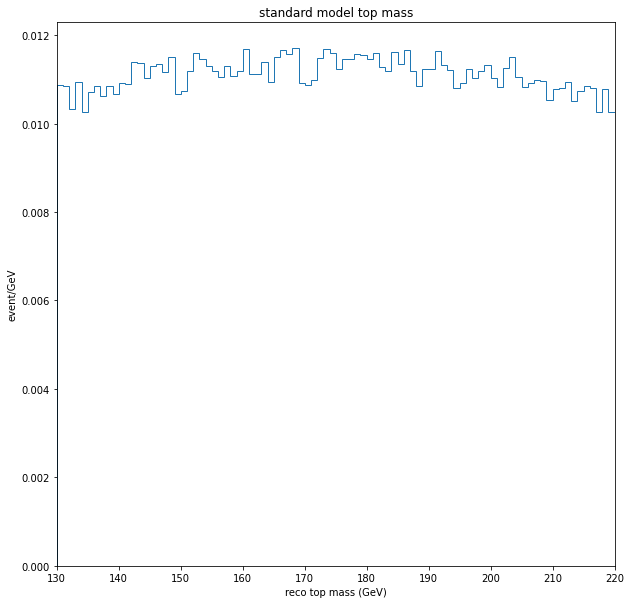

In [44]:
plt.figure(figsize=(10,10))
plt.hist(reco, density=True,
        histtype='step', bins=90)
plt.xlim(130, 220)
plt.title('standard model top mass')
plt.xlabel('reco top mass (GeV)')
plt.ylabel('event/GeV')
plt.show()

In [37]:
def chi2(mt1, mt2): #mt1 is the observation, mt2 is the expected
    n1, bins1 = np.histogram(mt1)
    n2, bins2 = np.histogram(mt2)
    chi2_value = 2*sum([n1[i] - n2[i] + n2[i]*np.log(n2[i]/n1[i]) for i in range(len(n1))])
    plt.show()
    return chi2_value

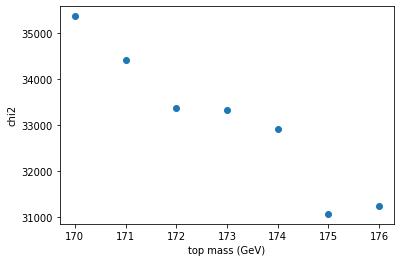

In [39]:
chi2_arr = [chi2(reco, reco_dic[m]) for m in mass]
plt.scatter(mass, chi2_arr)
plt.xlabel('top mass (GeV)')
plt.ylabel('chi2')
plt.show()